# Perkenalan

Dibuat Oleh Arry Pandowo, student Full Stack Data Science Batch 01 Hacktiv8 untuk pemenuhan Milestone #01 Phase 02

> ### Data yang digunakan


Dataset yang digunakan adalah data perusahaan telekomunikasi yang bergerak dibidang jasa internet dan pelengkap lainnya yang terdiri dari 19 kolom feature dengan target yaitu Churnn.

Churnn merupakan kondisi dimana seorang konsumen memutuskan untuk tetap berlangganan jasa yang ditawarkan oleh perusahaan telekomunkasi ini atau tidak untuk sebulan terakhir.

> ### Tujuan yang ingin dicapai

1. Melakukan analisa atas hubungan antar feature yang mempengaruhi hasil prediksi yaitu Churn oleh seorang pelanggan
2. membuat model prediktif dengan akurasi sebaik mungkin.
3. mengimplementasikan praktik sequential API, Functional API, dan GridSearchCV sebagai metode untuk melakukan hyperparameter tuning

# Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


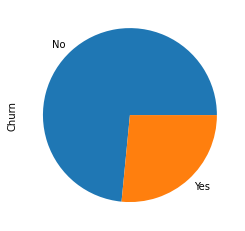

In [6]:
df['Churn'].value_counts().plot(kind='pie')
plt.show()

> terdeteksi Label Imbalance, perlu dilakukan tindakan lebih lanjut sebelum data dapat digunakan pada proses fitting, pengolahan akan dilakukan pada tahapan preprocessing

# Data Cleaning

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak terdapat missing value, dapat dilakukan proses ke tahapan selanjutnya

## Total Charges Object? 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
print(df['TotalCharges'].value_counts(), type(df['TotalCharges']))

           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
824.75      1
279.55      1
5763.15     1
180.3       1
147.5       1
Name: TotalCharges, Length: 6531, dtype: int64 <class 'pandas.core.series.Series'>


> terdapat indikasi keanehan data Total Charges, tipe data seharusnya boolean namun terbaca object dengan unique value 6531 records, diduga terdapat data NaN yang berisi karakter spasi.

Terdapat 11 records dengan menggunakan karakter spasi pada records, data akan diproses untuk diubah menjadi NA pada records tersebut 

In [10]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [11]:
df.dropna(inplace=True)

dikarenakan jumlah entry hanya 11, maka diputuskan untuk dilakukan drop atas records NaN

In [12]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

> Tipe data diubah menjadi float agar data dapat diproses pada tahapan selanjutnya

# Eksplorasi Data

## Data Skewness

In [13]:
all_numeric = df.select_dtypes(exclude=['object'])

In [14]:
all_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7032 non-null   int64  
 1   tenure          7032 non-null   int64  
 2   MonthlyCharges  7032 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 274.7 KB


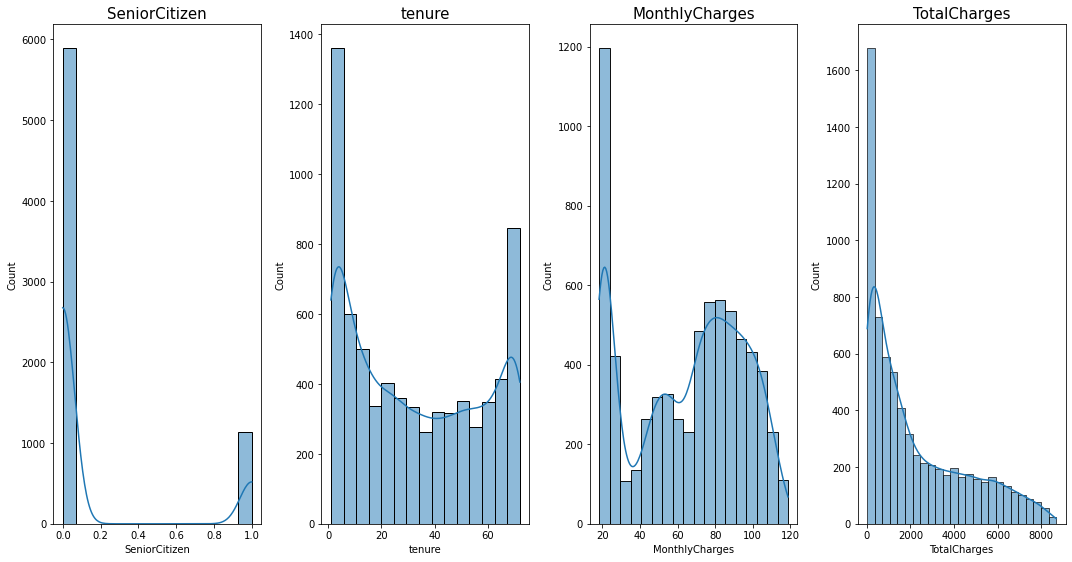

In [15]:
cols = list(all_numeric)
plt.figure(figsize = (15, 15))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 4, i + 1)
    sns.histplot(all_numeric[cols[i]], kde=True)
    plt.title(cols[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

> terdapat kecenderungan skewness ke satu sisi pada feature total charges namun untuk mempermudah proses maka diasumsikan data diatas merupakan distribusi normal

## Tenure Total Charge to Churnn

<Figure size 2160x2160 with 0 Axes>

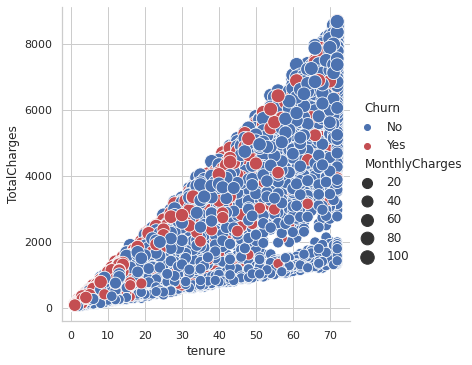

In [16]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize = (30, 30))
sns.relplot(
    data=df,
    x="tenure", y="TotalCharges",
    hue="Churn", size="MonthlyCharges",
    palette=["b", "r"], sizes=(100, 200))
plt.show()

> Berdasarkan pergerakan data pada grafik diatas, terdapat hubungan berbanding lurus antara customer yang memiliki tenur tinggi memiliki kecendungan untuk churn utamanya yang memiliki nominal monthly charges lebih besar

## Korelasi Payment method total charges to churn

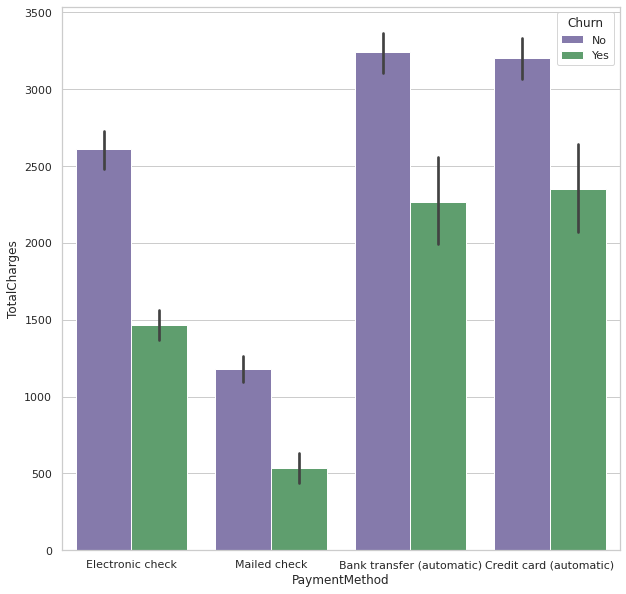

In [17]:
fig = plt.figure(figsize = (10, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x="PaymentMethod", y="TotalCharges",
            hue="Churn", palette=["m", "g"],
            data=df)

> Terdapat korelasi yang menarik dimana orang yang memiliki metode pembayaran yang automatic memiliki kecenderungan untuk tidak melakukan Churn dengan jumlah total charges yang cukup signifikan lebih tinggi dibandingkan dengan metode pembayaran lainnya, Dinilai  perlu adannya penerapan strategi khusus untuk jenis klien dengan model subscription berikut.

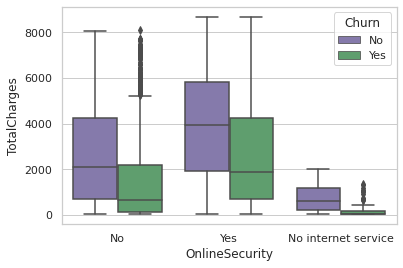

In [18]:
sns.boxplot(x="OnlineSecurity", y="TotalCharges",
            hue="Churn", palette=["m", "g"],
            data=df)

> Dapat disimpulkan bahwa orang orang yang memiliki awareness tinggi terhadap Online Security memiliki kecenderungan total Charges yang lebih banyak, terdapat data outlier cukup signifikan pada kategori No namun tidak dilakukan tindakan lebih lanjut.

# Data Preprocessing

## Subset data

Untuk mempermudah proses trial and error maka dilakukan pengelompokan data berdasarkan kategori data 

In [19]:
all_numeric = df.select_dtypes(exclude=['object'])
all_string  = df.select_dtypes(include = ['object'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [21]:
for col in all_string:
    print(col, all_string[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [22]:
df_binary = all_string[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']]
df_cat = all_string[['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']]

## Encoding data

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Get Dummies

In [24]:
df = pd.get_dummies(data = df, columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])

## Label Encoder

In [25]:
enc = LabelEncoder()
for col in df_binary:
    df[col] = enc.fit_transform(df_binary[col])

## Feature Selection with random forest

### Pipeline Feature Selection

In [26]:
df = df.drop(['customerID'], axis = 1)
X=df.drop(['Churn'], axis = 1)
y=df['Churn']

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y ,random_state=42)
display(X_train.shape, X_test.shape)

(4922, 40)

(2110, 40)

In [28]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
pipe_feature = Pipeline(steps=[
    ['oversampling', SMOTE(random_state=69)],
    ['scaler', MinMaxScaler()],
    ['feature_selection', SelectFromModel(RandomForestClassifier())],
], memory="fitted_RF")

In [30]:
pipe_feature

Pipeline(memory='fitted_RF',
         steps=[['oversampling',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=69, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')],
                ['scaler', MinMaxScaler(copy=True, feature_range=(0, 1))],
                ['feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier...
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,
                                                                  min_impurity_decrease=0.0,
                                                     

In [31]:
pipe_feature.fit(X_train, y_train)
selected_feat= X_train.columns[(pipe_feature['feature_selection'].get_support())]
print('Feature yang terpilih', (selected_feat.tolist()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Feature yang terpilih ['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']


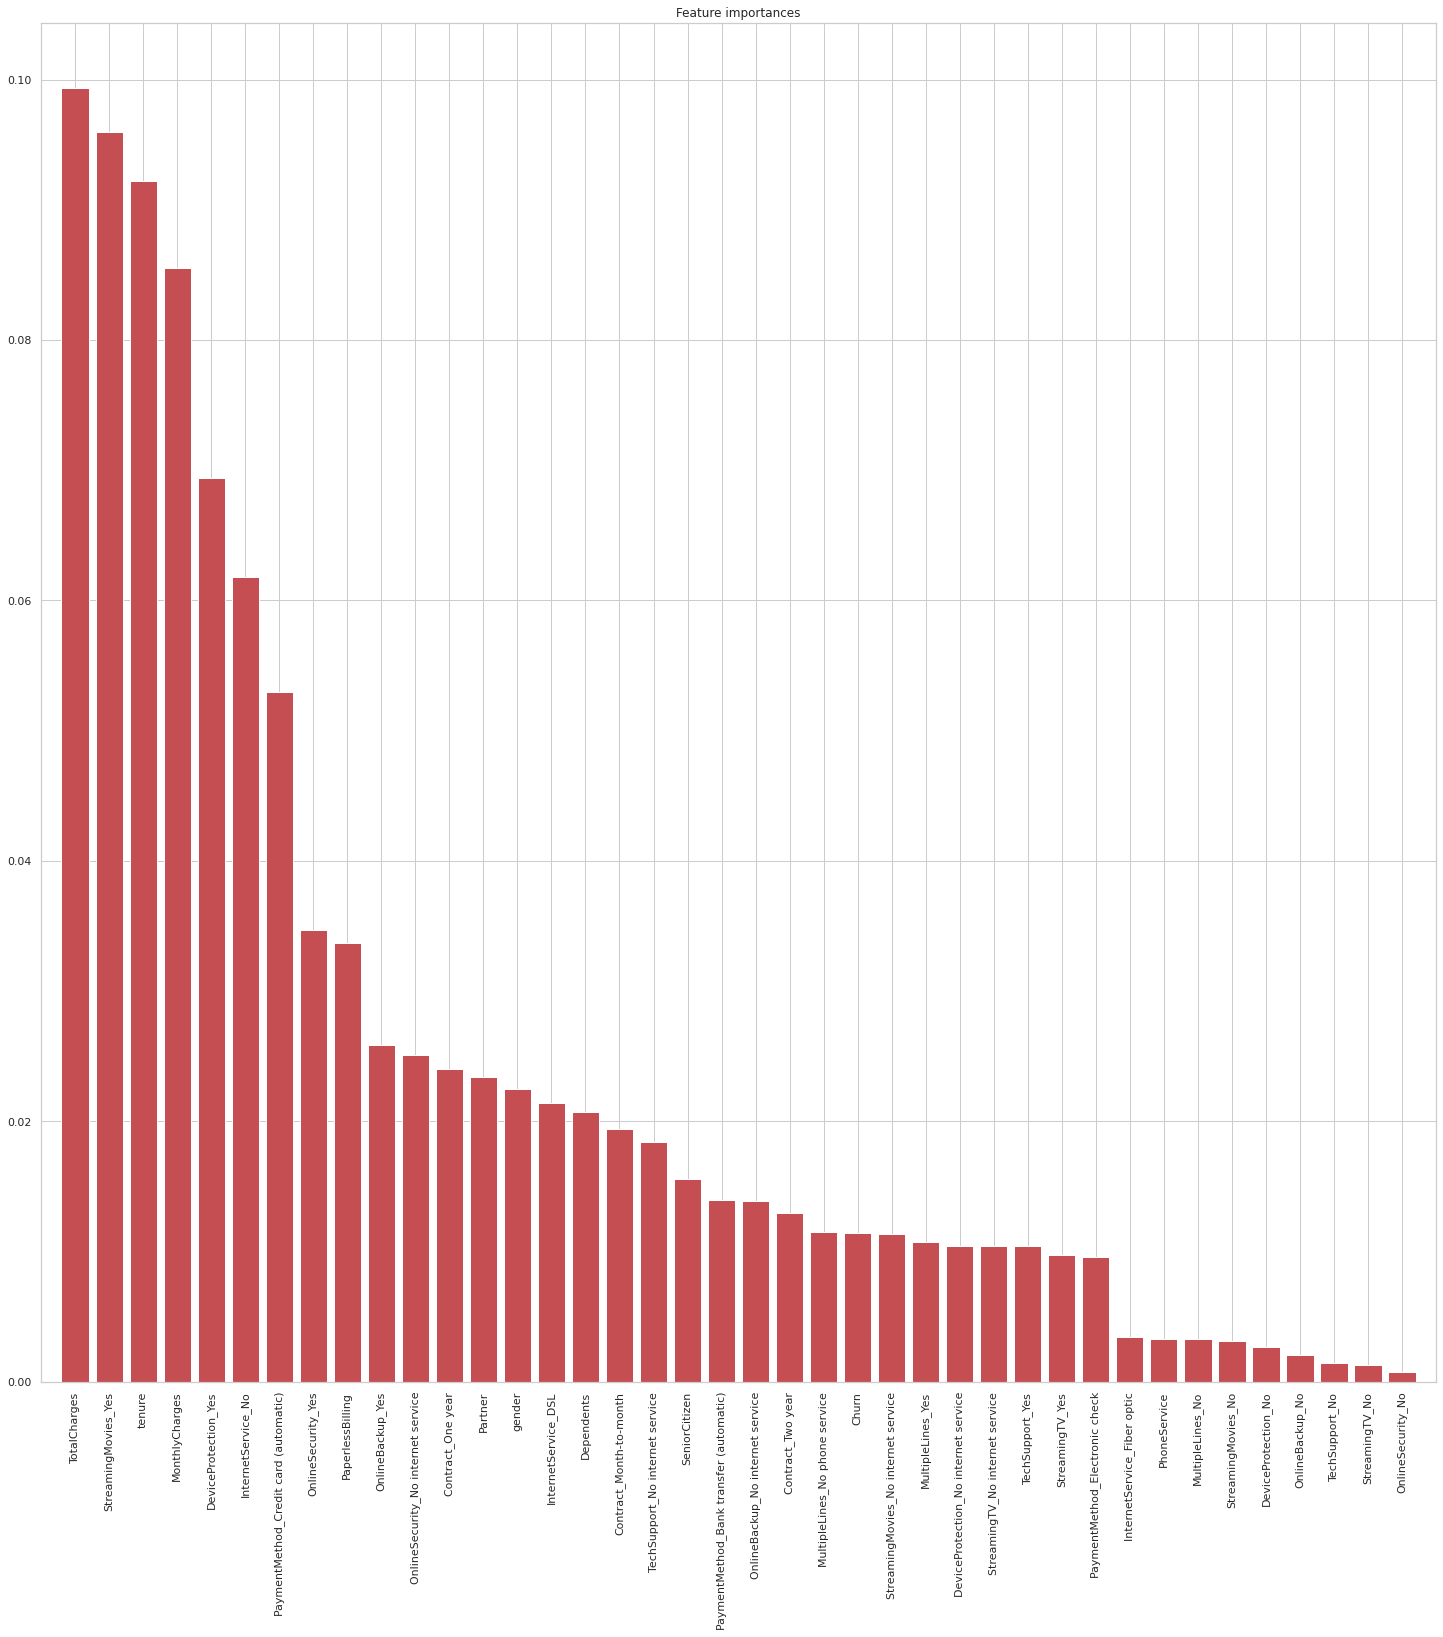

In [32]:
importances = pipe_feature['feature_selection'].estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize = (25, 25))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), df.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

> Sesuai dengan proses yang dilakukan di EDA, total charges dan montly payment method memiliki signifikansi yg tinggi terhadap output dari target.

> berdasarkan hasil maka dilakukan drop feature pada 9 feature dengan skor importance yang rendah untuk lanjut kepada tahapan penyusunan df_final

In [34]:
df_final = df.drop(['OnlineBackup_No', 'PhoneService', 'StreamingMovies_No', 'MultipleLines_No', 'StreamingTV_No', 'InternetService_Fiber optic', 'TechSupport_No', 'DeviceProtection_No', 'OnlineSecurity_No'], axis=1)

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PaperlessBilling                         7032 non-null   int64  
 6   MonthlyCharges                           7032 non-null   float64
 7   TotalCharges                             7032 non-null   float64
 8   Churn                                    7032 non-null   int64  
 9   MultipleLines_No phone service           7032 non-null   uint8  
 10  MultipleLines_Yes                        7032 no

## Scaling DF Final untuk sebelum dilakukan proses training model

In [36]:
scaler=StandardScaler()
scaler.fit(df_final)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
X=df_final.drop(['Churn'], axis = 1)
y=df_final['Churn']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.1, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=(2/9), random_state=0, stratify=y)
display(X_train.shape, X_test.shape, X_val.shape)

(5469, 31)

(1563, 31)

(704, 31)

# Pendefinisian Model  & Pelatihan Model 

## Implementasi Pipeline Base Model

In [38]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [39]:
def create_model():
    model = Sequential()
    model.add(Dense(16, input_shape=(31,),kernel_initializer='uniform', activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,kernel_initializer="uniform",activation="sigmoid"))
    model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [40]:
pipe_base = Pipeline(steps=[
    ['oversampling', SMOTE(random_state=42)],
    ['scaler', MinMaxScaler()],
    ['model1', KerasClassifier(build_fn=create_model,epochs=50, batch_size=8,verbose=0)],
], memory="cache_folder")

In [41]:
pipe_base.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory='cache_folder',
         steps=[('oversampling',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ['model1',
         verbose=False)

> Dikarenakan adanya batasan dari library imbalance learn, maka akan dilakukan pendefinisian ulang dengan keras classifier untuk melakukan evaluasi atas model yagn sudah dibuat dengan mengguanakn metode evaluate dan melakukan analisis terhadap classification report

# SMOTE

Dilakukan proses pendefinisian ulang dikarenakan issue diatas sesuai agar dapat dilakukan visualisasi atas hasil dari model fit yang telah dilakukan

In [42]:
y_train.value_counts()

0    4015
1    1454
Name: Churn, dtype: int64

In [43]:
X_train.shape

(5469, 31)

In [44]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [45]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 4015]
 [   1 4015]]


In [47]:
keras.backend.clear_session()

In [48]:
np.random.seed(69)
tf.random.set_seed(69)

## Base Model

In [49]:
model = Sequential()
model.add(Dense(27, input_shape=(31,),kernel_initializer='uniform', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(18, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(9, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,kernel_initializer="uniform",activation="sigmoid"))

Catatan pemilihan Hyperparameter :

* kernel_initializer dipilih dikarenakan distribusi data yang diasumsikan normal ditambah dengan dilakukannya scaling dengan menggunakan standard scaler maka diharapkan data dapat terbaca lebih baik oleh model sebagai data yang terdistribusi secara normal
* Activation relu dipilih dikarenakan activation yang cepat dalam performance dengan output sigmoid output berupa binary classification

In [50]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

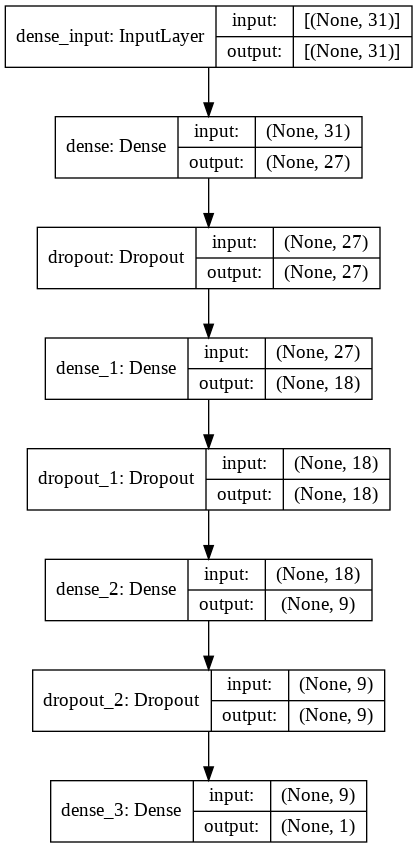

In [51]:
keras.utils.plot_model(model, show_shapes=True)

In [52]:
history = model.fit(X_train,y_train,epochs=200,batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6787 - accuracy: 0.5828 - val_loss: 0.6321 - val_accuracy: 0.7230
Epoch 2/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6771 - accuracy: 0.6305 - val_loss: 0.6337 - val_accuracy: 0.6761
Epoch 3/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6678 - accuracy: 0.6450 - val_loss: 0.6214 - val_accuracy: 0.6832
Epoch 4/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6393 - accuracy: 0.6628 - val_loss: 0.6273 - val_accuracy: 0.6903
Epoch 5/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6255 - accuracy: 0.6873 - val_loss: 0.6152 - val_accuracy: 0.7145
Epoch 6/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6200 - accuracy: 0.7039 - val_loss: 0.6255 - val_accuracy: 0.7088
Epoch 7/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6098 - accuracy: 0.7126 - val_loss: 0.5900 - val_accuracy: 0.7344

## Model Evaluation

In [53]:
model.evaluate(X_val,y_val)
y_pred = model.predict(X_val)
y_pred_actual = []
for ele in y_pred:
    if ele > 0.5:
        y_pred_actual.append(1)
    else :
        y_pred_actual.append(0)

22/22 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7415


## Classification Report Matrix

In [54]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_val,y_pred_actual))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80       517
           1       0.51      0.79      0.62       187

    accuracy                           0.74       704
   macro avg       0.71      0.76      0.71       704
weighted avg       0.80      0.74      0.76       704



> F1-score pada masing masing class menunjukan angka yang cukup memuaskan pada model basic, dengan akurasi total 74%

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

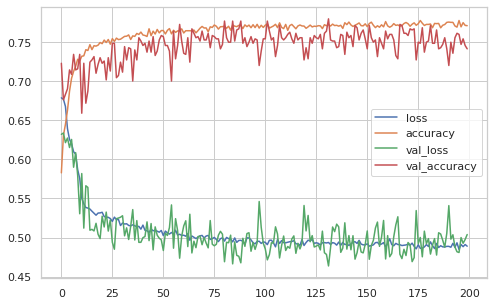

In [56]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

terlihat bahwa skor loss masih cukup fluktuatif dan model masih terlihat under fitting namun model telah berhasil membaca pola dengan mengikuti data train yang telah di fit ke model

In [57]:
keras.backend.clear_session()

In [58]:
np.random.seed(69)
tf.random.set_seed(69)

# Functional API (Wide And Deep Vanila)

In [59]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(20, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model2 = keras.models.Model(inputs=[input_], outputs=[output])
model2.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

> Functional API Wide and Deep dari papper "https://research.google/pubs/pub45413/" digunakan secara vanila dengan tambahan activation output sigmoid pada layer output dikarenakan target memiliki classification binary

In [60]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 31)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           960         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 20)           620         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 51)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

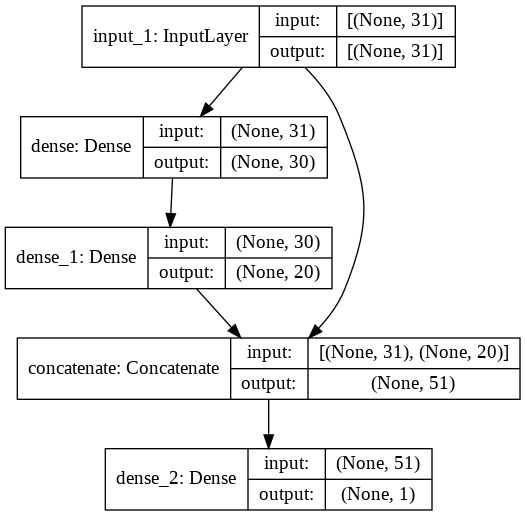

In [61]:
keras.utils.plot_model(model2, show_shapes=True)

In [62]:
history = model2.fit(X_train, y_train, epochs=200, batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/200
803/803 [==============================] - 2s 2ms/step - loss: 0.4992 - accuracy: 0.5000 - val_loss: 0.7281 - val_accuracy: 0.2656
Epoch 2/200
803/803 [==============================] - 1s 2ms/step - loss: 0.4966 - accuracy: 0.4999 - val_loss: 0.7257 - val_accuracy: 0.2656
Epoch 3/200
803/803 [==============================] - 1s 2ms/step - loss: 0.4962 - accuracy: 0.4989 - val_loss: 0.7241 - val_accuracy: 0.2670
Epoch 4/200
803/803 [==============================] - 1s 2ms/step - loss: 0.4962 - accuracy: 0.4963 - val_loss: 0.7248 - val_accuracy: 0.2656
Epoch 5/200
803/803 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.4978 - val_loss: 0.7210 - val_accuracy: 0.2713
Epoch 6/200
803/803 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.4948 - val_loss: 0.7137 - val_accuracy: 0.2741
Epoch 7/200
803/803 [==============================] - 1s 2ms/step - loss: 0.4431 - accuracy: 0.5314 - val_loss: 0.2014 - val_accuracy: 0.7429

In [64]:
model2.evaluate(X_val,y_val)
y_pred = model2.predict(X_val)
y_pred_actual = []
for ele in y_pred:
    if ele > 0.5:
        y_pred_actual.append(1)
    else :
        y_pred_actual.append(0)

22/22 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.7301


In [65]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_val,y_pred_actual))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79       517
           1       0.50      0.86      0.63       187

    accuracy                           0.73       704
   macro avg       0.71      0.77      0.71       704
weighted avg       0.81      0.73      0.75       704



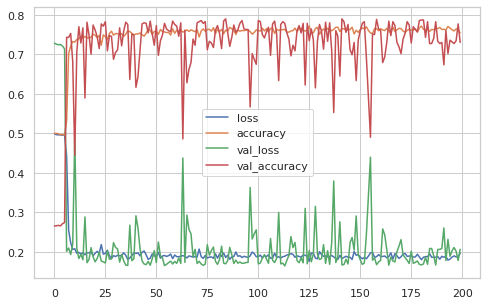

In [66]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

> Model berhasil menekan angka loss hingga 0.2-ish dikarenakan terdapat data dari layer input yang di teruskan langsung ke layer output

* data tersebut diteruskan melalui neuron input dan diproses oleh activation sigmoid sehingga data training loss dapat ditekan secara signifikan, namun terdapat kekurangan yaitu data yang diproses pada hidden layer tidak maksimal sehingga val accuracy jatuh signifikan pada beberapa epoch ke angka 50%
* hal yang terjadi pada epoch tertentu atas data diatas dapat disebabkan karna adanya data outlier sesuai dengan deteksi yang dilakukan pada tahapan EDA

# Freestyle Functional API

In [67]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(16, activation="relu")(input_)
hidden2 = keras.layers.Dense(4, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(16, activation="relu")(input_)
hidden4 = keras.layers.Dense(4, activation="relu")(hidden3)
concat = keras.layers.concatenate([input_, hidden2, hidden4])
output = keras.layers.Dense(1,  activation="sigmoid")(concat)
model3 = keras.models.Model(inputs=[input_], outputs=[output])
model3.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

as the tittle said, it is freestyle, dengan konsideran :
> Terdapat 2 hidden layer terpisah dengan output yang diteruskan kepada hidden layer

* 2 hidden layer terpisah dengan masing masing neuron individual diharapkan data dapat belajar secara terpisah di masing masing hiddenlayer sebelum akhirnya diproses lebih lanjut pada layer output dengan activation sigmoid

In [68]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 31)]         0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 16)           512         input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 16)           512         input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 4)            68          dense_3[0][0]                    
____________________________________________________________________________________________

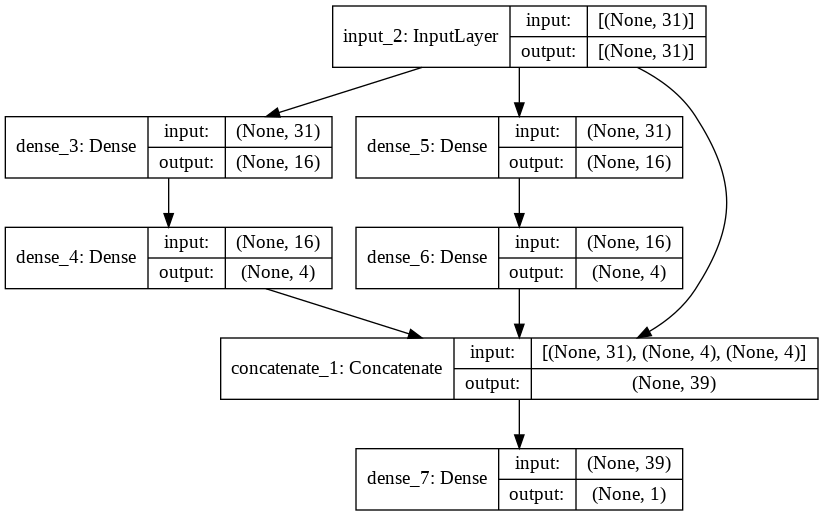

In [71]:
keras.utils.plot_model(model3, show_shapes=True)

In [70]:
history = model3.fit(X_train,y_train,epochs=200,batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/200
803/803 [==============================] - 2s 2ms/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.7342 - val_accuracy: 0.2656
Epoch 2/200
803/803 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.6504 - val_loss: 0.2622 - val_accuracy: 0.6960
Epoch 3/200
803/803 [==============================] - 1s 2ms/step - loss: 0.2732 - accuracy: 0.7016 - val_loss: 0.2364 - val_accuracy: 0.7358
Epoch 4/200
803/803 [==============================] - 1s 2ms/step - loss: 0.2544 - accuracy: 0.7143 - val_loss: 0.2415 - val_accuracy: 0.7287
Epoch 5/200
803/803 [==============================] - 2s 2ms/step - loss: 0.2402 - accuracy: 0.7158 - val_loss: 0.2363 - val_accuracy: 0.7244
Epoch 6/200
803/803 [==============================] - 2s 2ms/step - loss: 0.2245 - accuracy: 0.7235 - val_loss: 0.2293 - val_accuracy: 0.7003
Epoch 7/200
803/803 [==============================] - 1s 2ms/step - loss: 0.2131 - accuracy: 0.7259 - val_loss: 0.1844 - val_accuracy: 0.7656

In [73]:
model3.evaluate(X_val,y_val)
y_pred = model3.predict(X_val)
y_pred_actual = []
for ele in y_pred:
    if ele > 0.5:
        y_pred_actual.append(1)
    else :
        y_pred_actual.append(0)

22/22 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.7216


In [74]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_val,y_pred_actual))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78       517
           1       0.49      0.88      0.63       187

    accuracy                           0.72       704
   macro avg       0.71      0.77      0.70       704
weighted avg       0.82      0.72      0.74       704



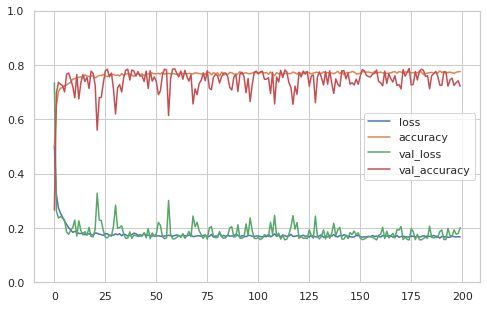

In [75]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

> hasil dari pemisahan 2 hidden layer secara individu dapat berhasil menekan angka fluktuatif yg didapat dari Deep and Wide,, hasilnya val accuracy menjadi lebih stabil dan mendekati angka accuracy train (walaupun masih agak underfitting)

> hal tersebut juga digambarkan pada loss dengan val los yang jauh lebih stabil jika dibandingan dengan Deep and Wide

this is deep and wider :)

In [76]:
keras.backend.clear_session()

In [77]:
np.random.seed(69)
tf.random.set_seed(69)

# Extra Freestyle FUnctional API

In [82]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(16, kernel_initializer="lecun_normal" ,activation="relu")(input_)
alpha1 = keras.layers.AlphaDropout(0.3)(hidden1)
hidden2 = keras.layers.Dense(16, kernel_initializer="lecun_normal" ,activation="relu")(input_)
drop = keras.layers.AlphaDropout(0.3)(hidden2)
concat = keras.layers.concatenate([input_, alpha1, drop])
output = keras.layers.Dense(1,activation="sigmoid")(concat)
model4 = keras.models.Model(inputs=[input_], outputs=[output])
model4.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

Experimental with Alphadrout, dimana Alphadropout akan melakukan penyesuaian atas means dan variance dari data yang di proses didalam neuron kepada nilai aslinya

In [83]:
model4.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 31)]         0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 16)           512         input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 16)           512         input_2[0][0]                    
__________________________________________________________________________________________________
alpha_dropout_2 (AlphaDropout)  (None, 16)           0           dense_3[0][0]                    
____________________________________________________________________________________________

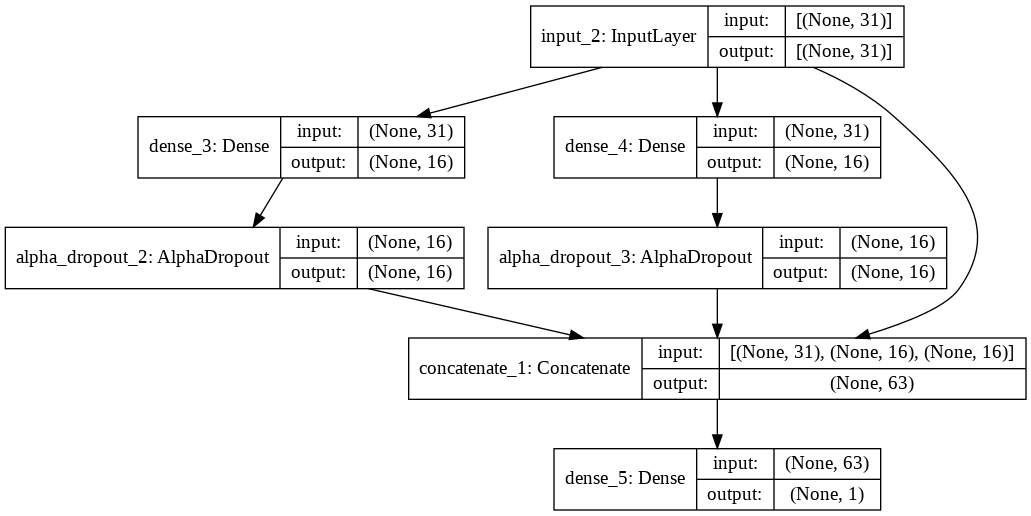

In [84]:
keras.utils.plot_model(model4, show_shapes=True)

In [85]:
history = model4.fit(X_train,y_train,epochs=200,batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/200
803/803 [==============================] - 2s 2ms/step - loss: 0.5243 - accuracy: 0.4552 - val_loss: 0.7299 - val_accuracy: 0.2656
Epoch 2/200
803/803 [==============================] - 1s 2ms/step - loss: 0.4908 - accuracy: 0.4938 - val_loss: 0.4615 - val_accuracy: 0.4773
Epoch 3/200
803/803 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.5379 - val_loss: 0.2696 - val_accuracy: 0.7230
Epoch 4/200
803/803 [==============================] - 1s 2ms/step - loss: 0.4282 - accuracy: 0.5560 - val_loss: 0.2499 - val_accuracy: 0.7457
Epoch 5/200
803/803 [==============================] - 1s 2ms/step - loss: 0.3920 - accuracy: 0.5945 - val_loss: 0.2510 - val_accuracy: 0.7429
Epoch 6/200
803/803 [==============================] - 1s 2ms/step - loss: 0.3847 - accuracy: 0.6044 - val_loss: 0.2710 - val_accuracy: 0.7259
Epoch 7/200
803/803 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.5914 - val_loss: 0.2512 - val_accuracy: 0.7429

In [86]:
model4.evaluate(X_val,y_val)
y_pred = model4.predict(X_val)
y_pred_actual = []
for ele in y_pred:
    if ele > 0.5:
        y_pred_actual.append(1)
    else :
        y_pred_actual.append(0)

22/22 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.7259


In [87]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_val,y_pred_actual))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       517
           1       0.49      0.73      0.59       187

    accuracy                           0.73       704
   macro avg       0.69      0.73      0.69       704
weighted avg       0.78      0.73      0.74       704



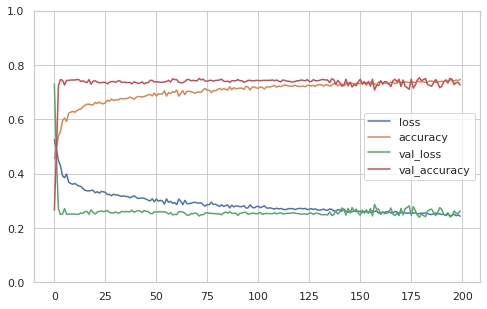

In [88]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

> Kombinasi antara lecun_normal dan alphadropout memiliki hasil yang memuaskan dimana model berhasil membaca model dengan cukup baik dan Alphadropout berhasil menjaga anga mean dan variance berada disekitar nilai aslinya

* kombinasi antara 2 hal tersebut dikenal dengan nama selu activation

and this is deep selu and alpha wide

# GridSearch CV

And here we are, everyone's favourite

> gridsearch dilakukan untuk melakukan tuning terhadap base model yagn telah ditentukan diatas dengan fokys untuk melakukan pencarian hyperparameter yang menghasilkan akurasi terbaik khususnya kombinasi antara kernel_initializer dan dropout rate 

> epoch diubah menjadi 50 dikarenakan pada base model pada epoch 50 telah dinilai cukup stabil dan untuk mengurangi computational cost pada saat proses fitting

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
def create_model(activation='relu',init_mode = 'uniform', dropout_rate= 0.3, optimizers=keras.optimizers.Adam(learning_rate=0.0001)):
    model = Sequential()
    model.add(Dense(27 ,kernel_initializer=init_mode,activation=activation, input_shape=(31,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(18,kernel_initializer=init_mode,activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(9,kernel_initializer=init_mode,activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer=init_mode,activation="sigmoid"))
    model.compile(optimizer=optimizers, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [91]:
model = KerasClassifier(build_fn=create_model, verbose=0)
params=[
        {'batch_size':[10], 'epochs':[50], 'init_mode' :['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'], 'dropout_rate' :[0.1, 0.3], 'activation':['relu']}]
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [92]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best params:\n{}\n".format(grid_result.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_result.best_score_))
print("Test-set score: {:.2f}".format(grid_result.score(X_test, y_test)))

Best: 0.629622 using {'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.3, 'epochs': 50, 'init_mode': 'uniform'}
0.582306 (0.065544) with: {'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init_mode': 'uniform'}
0.403844 (0.198664) with: {'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init_mode': 'lecun_uniform'}
0.613935 (0.069751) with: {'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init_mode': 'normal'}
0.188150 (0.110531) with: {'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init_mode': 'zero'}
0.335972 (0.158473) with: {'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init_mode': 'glorot_normal'}
0.342453 (0.083079) with: {'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init_mode': 'glorot_uniform'}
0.345066 (0.084887) with: {'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init_

base model dinilai sudah ideal berdasarkan hyperparameter tuning

# Best model with best hyperparameter result with full epoch (200)

In [93]:
model_final = Sequential()
model_final.add(Dense(27, input_shape=(31,),kernel_initializer='uniform', activation = 'relu'))
model_final.add(Dropout(0.3))
model_final.add(Dense(18, kernel_initializer='uniform', activation='relu'))
model_final.add(Dropout(0.3))
model_final.add(Dense(9, kernel_initializer='uniform', activation='relu'))
model_final.add(Dropout(0.3))
model_final.add(Dense(1,kernel_initializer="uniform",activation="sigmoid"))

In [94]:
model_final.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

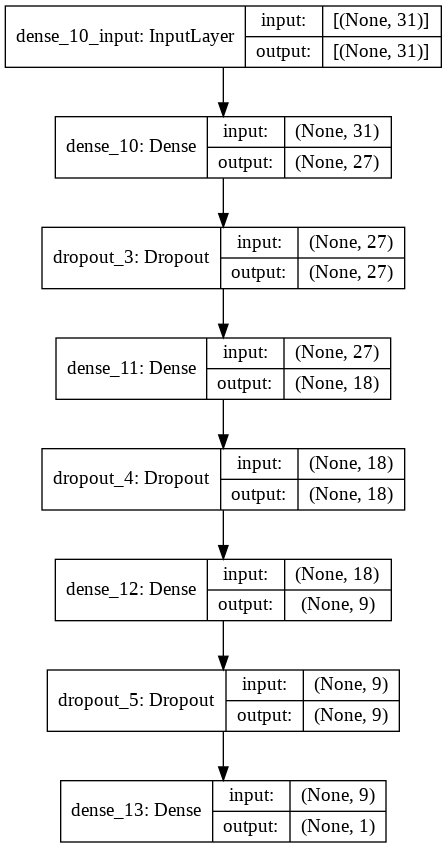

In [95]:
keras.utils.plot_model(model_final, show_shapes=True)

In [96]:
history = model_final.fit(X_train,y_train,epochs=200,batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6821 - accuracy: 0.5743 - val_loss: 0.6367 - val_accuracy: 0.7145
Epoch 2/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6659 - accuracy: 0.6507 - val_loss: 0.6248 - val_accuracy: 0.6918
Epoch 3/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6293 - accuracy: 0.6812 - val_loss: 0.6290 - val_accuracy: 0.6889
Epoch 4/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6218 - accuracy: 0.6936 - val_loss: 0.6241 - val_accuracy: 0.7045
Epoch 5/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6133 - accuracy: 0.7017 - val_loss: 0.6137 - val_accuracy: 0.7188
Epoch 6/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6125 - accuracy: 0.7088 - val_loss: 0.6206 - val_accuracy: 0.7088
Epoch 7/200
803/803 [==============================] - 2s 2ms/step - loss: 0.6059 - accuracy: 0.7132 - val_loss: 0.5978 - val_accuracy: 0.7244

In [97]:
model_final.evaluate(X_val,y_val)
y_pred = model_final.predict(X_val)
y_pred_actual = []
for ele in y_pred:
    if ele > 0.5:
        y_pred_actual.append(1)
    else :
        y_pred_actual.append(0)

22/22 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7599


In [98]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_val,y_pred_actual))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       517
           1       0.53      0.75      0.63       187

    accuracy                           0.76       704
   macro avg       0.71      0.76      0.72       704
weighted avg       0.80      0.76      0.77       704



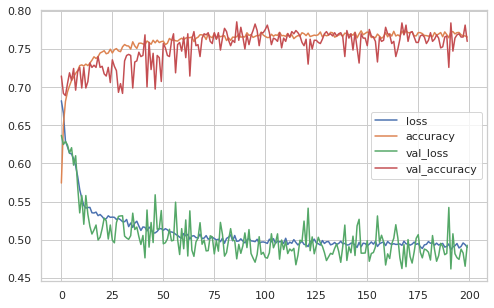

In [99]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

# Model Saving with Best parameter

In [101]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model_final.save('saved_model/my_model')
model_final.save('my_model.h5') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


# Model Inference

## Dataset inference

In [102]:
from google.colab import files
uploaded = files.upload()

Saving inference.xls to inference.xls


In [103]:
df_inference = pd.read_csv('inference.xls', sep = ';')

In [106]:
X_inference = df_inference.drop(['Churn'], axis=1)

In [107]:
X_inference

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,1,29.85,29.85,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,0,56.95,1889.50,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,53.85,108.15,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,42.30,1840.75,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,70.70,151.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,8,1,99.65,820.50,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0
6,1,0,0,1,22,1,89.10,1949.40,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
7,0,0,0,0,10,0,29.75,301.90,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,0,0,1,0,28,1,104.80,3046.05,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0
9,1,0,0,1,62,0,56.15,3487.95,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [108]:
hasil = model_final.predict(X_inference)

In [109]:
for i in hasil:
    if i > 0.5:
        print('1')
    else :
       print('0')

1
0
0
0
1
1
1
0
1
0


Model berhasil melakukan prediksi atas data inference

# Kesimpulan 

## Model Analysist


### Base Model & Grid Search
Secara umum model dinilai telah cukup baik membaca pergerakan data dan melakukan proses model inference, walaupun terdapat indikasi underfitting hal tersebut dapat dimaklumi dikarenakan sequential ANN memiliki keterbatasan dalam mempelajari data, namun terdapat catatan sebagai berikut apabila ingin tetap menggunakan Sequential ANN sebagai model utama


> best model dapat ditingkatkan performance nya apabila :
* dilakukan scaler dengan menggunakan robust scaler, saat ini data masih diasumsikan sebagai data distribusi normal, padahal seperti yang digambarkan pada eda dan proses label imbalance terdapat skewness ke satu arah tertentu
* dilakukan hyper parameter tuning dengan gridsearchcv yang lebih detail dengan menggunakan kombinasi yang lebih banyak seperti momentum, learnignrate, optimizer dll.

### Functional API and friends

Selu Activation ftw, selu activation secara sangat baik telah mempelajari pergerakan data, dengan kombinasi antara lecun_normal sebagai initializer dan asumsi bahwa data adalah distribusi normal dengan dibantu standardscaller, model berhasil membaca pola tanpa adanya indikasi overfitting

Arsitektur wide and deep juga merupakan basis yg sangat baik untuk dikombinasikan dengan selu activation, dengan loss yg kecil dan akurasi yg cukup baik

### Data Analysist

Dari sisi bisnis dapat terlihat bahwa ada segmen konsumen yang perlu dimaintain, utamanya yang berkaitan dengan konsumen yang memiliki kecenderungan highspender (dapat dilihat dari total charges) dengan metode pembayaran otomatis.

perlu juga dilakukan pendekatan marketting lebih lanjut kepada konsumen yang memiliki tingkat awareness terhadap OnlineSecurity untuk dapat menggunakan layanan lainnya yang belum mereka gunakan, dikarenakan pelanggan dengan OnlineSecurity Awareness memiliki kecenderungan menjadi pelanggan setia (kemungkinan untuk churn rendah) 



> N. B : Perlu dilakukan pipeline per model untuk menghindari data leakage
(will figure it out later how to properly do it)